In [1]:
!pip install tensorflow

In [2]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000) # 로이터 데이터셋 로드하기

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
train_labels[10]

3

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1.
    return results # 데이터 인코딩하기

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels) # 레이블 인코딩하기

In [10]:
y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
y_train.shape

(8982, 46)

In [12]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [13]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
]) # 모델 정의하기

In [14]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']) # 모델 컴파일하기

In [15]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:] # 검증 세트 준비하기

In [16]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val)) # 모델 훈련하기

Epoch 1/20


16/16 [==============================] - 3s 65ms/step - loss: 2.6853 - accuracy: 0.5197 - val_loss: 1.8126 - val_accuracy: 0.6180
Epoch 2/20
16/16 [==============================] - 0s 29ms/step - loss: 1.5002 - accuracy: 0.6807 - val_loss: 1.3321 - val_accuracy: 0.7090
Epoch 3/20
16/16 [==============================] - 1s 30ms/step - loss: 1.1429 - accuracy: 0.7511 - val_loss: 1.1571 - val_accuracy: 0.7400
Epoch 4/20
16/16 [==============================] - 0s 29ms/step - loss: 0.9274 - accuracy: 0.7979 - val_loss: 1.0735 - val_accuracy: 0.7620
Epoch 5/20
16/16 [==============================] - 1s 33ms/step - loss: 0.7640 - accuracy: 0.8351 - val_loss: 0.9702 - val_accuracy: 0.7940
Epoch 6/20
16/16 [==============================] - 0s 30ms/step - loss: 0.6377 - accuracy: 0.8614 - val_loss: 0.9115 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 0s 30ms/step - loss: 0.5302 - accuracy: 0.8886 - val_loss: 0.8872 - val_accuracy: 0.8090
Epoch 8/20


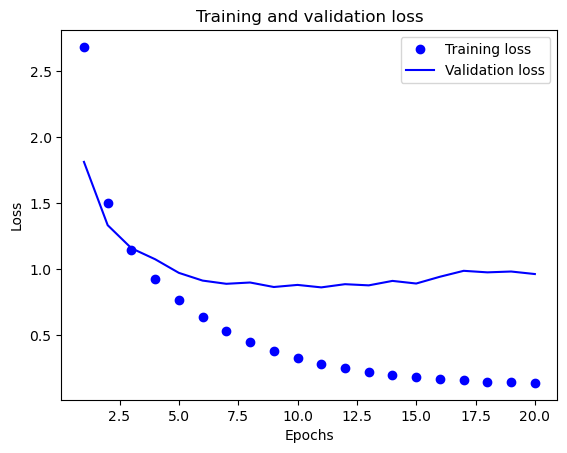

In [17]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label='Training loss')
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show() # 훈련과 검증 손싷 그리기

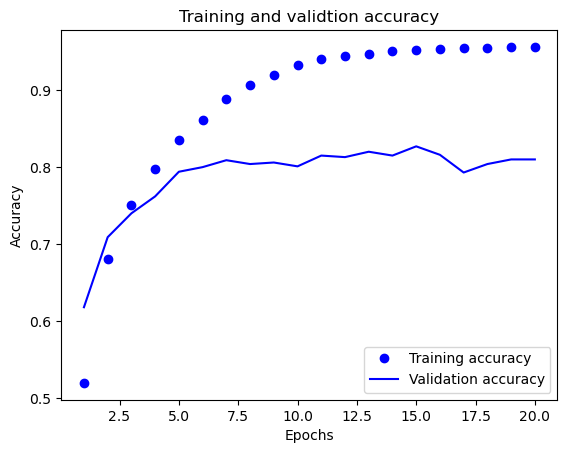

In [18]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, "bo", label='Training accuracy')
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validtion accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show() # 훈련과 검증 정확도 그리기

In [19]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test) # 모델을 처음부터 다시 훈련하기

Epoch 1/9
18/18 [==============================] - 2s 24ms/step - loss: 2.5527 - accuracy: 0.5228
Epoch 2/9
18/18 [==============================] - 0s 24ms/step - loss: 1.4482 - accuracy: 0.6841
Epoch 3/9
18/18 [==============================] - 0s 25ms/step - loss: 1.1306 - accuracy: 0.7513
Epoch 4/9
18/18 [==============================] - 0s 25ms/step - loss: 0.9161 - accuracy: 0.7995
Epoch 5/9
18/18 [==============================] - 0s 24ms/step - loss: 0.7616 - accuracy: 0.8362
Epoch 6/9
18/18 [==============================] - 0s 24ms/step - loss: 0.6301 - accuracy: 0.8641
Epoch 7/9
18/18 [==============================] - 0s 24ms/step - loss: 0.5290 - accuracy: 0.8851
Epoch 8/9
18/18 [==============================] - 0s 24ms/step - loss: 0.4438 - accuracy: 0.9044
Epoch 9/9
71/71 [==============================] - 1s 3ms/step - loss: 0.8870 - accuracy: 0.7970


In [20]:
results # 테스트 손실, 테스트정확도

[0.8870025277137756, 0.796972393989563]

In [21]:
predictions = model.predict(x_test) # 새로운 데이터에 대해서 예측하기
predictions[0].shape 

71/71 [==============================] - 0s 4ms/step


(46,)

In [22]:
np.sum(predictions[0])

1.0

In [23]:
np.argmax(predictions[0])

3

In [24]:
# 추가 실험

In [25]:
# 32개의 유닛 사용
model = keras.Sequential([
  layers.Dense(32, activation="relu"),
  layers.Dense(32, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)
results # 정확도 하락

Epoch 1/9
18/18 [==============================] - 1s 18ms/step - loss: 3.2286 - accuracy: 0.4264
Epoch 2/9
18/18 [==============================] - 0s 19ms/step - loss: 2.1835 - accuracy: 0.5823
Epoch 3/9
18/18 [==============================] - 0s 18ms/step - loss: 1.6044 - accuracy: 0.6737
Epoch 4/9
18/18 [==============================] - 0s 18ms/step - loss: 1.2967 - accuracy: 0.7242
Epoch 5/9
18/18 [==============================] - 0s 18ms/step - loss: 1.1102 - accuracy: 0.7580
Epoch 6/9
18/18 [==============================] - 0s 19ms/step - loss: 0.9770 - accuracy: 0.7840
Epoch 7/9
18/18 [==============================] - 0s 18ms/step - loss: 0.8658 - accuracy: 0.8098
Epoch 8/9
18/18 [==============================] - 0s 18ms/step - loss: 0.7705 - accuracy: 0.8334
Epoch 9/9
71/71 [==============================] - 1s 3ms/step - loss: 1.0471 - accuracy: 0.7680


[1.0470774173736572, 0.7680320739746094]

In [26]:
# 128개의 유닛 사용
model = keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)
results # 정확도 상승

Epoch 1/9
18/18 [==============================] - 2s 45ms/step - loss: 2.3477 - accuracy: 0.5355
Epoch 2/9
18/18 [==============================] - 1s 46ms/step - loss: 1.2771 - accuracy: 0.7182
Epoch 3/9
18/18 [==============================] - 1s 44ms/step - loss: 0.9425 - accuracy: 0.7960
Epoch 4/9
18/18 [==============================] - 1s 43ms/step - loss: 0.7262 - accuracy: 0.8428
Epoch 5/9
18/18 [==============================] - 1s 46ms/step - loss: 0.5605 - accuracy: 0.8808
Epoch 6/9
18/18 [==============================] - 1s 50ms/step - loss: 0.4582 - accuracy: 0.9022
Epoch 7/9
18/18 [==============================] - 1s 45ms/step - loss: 0.3591 - accuracy: 0.9206
Epoch 8/9
18/18 [==============================] - 1s 43ms/step - loss: 0.2934 - accuracy: 0.9333
Epoch 9/9
71/71 [==============================] - 1s 5ms/step - loss: 0.9345 - accuracy: 0.7939


[0.9345060586929321, 0.7938557267189026]

In [27]:
# 1개의 중간 층 사용
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)
results # 정확도 상승

Epoch 1/9
18/18 [==============================] - 2s 26ms/step - loss: 2.5494 - accuracy: 0.5434
Epoch 2/9
18/18 [==============================] - 0s 27ms/step - loss: 1.5134 - accuracy: 0.7013
Epoch 3/9
18/18 [==============================] - 0s 26ms/step - loss: 1.1348 - accuracy: 0.7662
Epoch 4/9
18/18 [==============================] - 0s 26ms/step - loss: 0.9181 - accuracy: 0.8114
Epoch 5/9
18/18 [==============================] - 0s 27ms/step - loss: 0.7662 - accuracy: 0.8421
Epoch 6/9
18/18 [==============================] - 1s 28ms/step - loss: 0.6476 - accuracy: 0.8690
Epoch 7/9
18/18 [==============================] - 0s 26ms/step - loss: 0.5529 - accuracy: 0.8879
Epoch 8/9
18/18 [==============================] - 1s 28ms/step - loss: 0.4764 - accuracy: 0.9021
Epoch 9/9
71/71 [==============================] - 1s 5ms/step - loss: 0.8566 - accuracy: 0.7979


[0.8565738797187805, 0.7978628873825073]

In [28]:
# 3개의 중간층 사용
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)
results # 정확도 하락

Epoch 1/9
18/18 [==============================] - 2s 27ms/step - loss: 2.8771 - accuracy: 0.3967
Epoch 2/9
18/18 [==============================] - 0s 27ms/step - loss: 1.5363 - accuracy: 0.6684
Epoch 3/9
18/18 [==============================] - 0s 27ms/step - loss: 1.1985 - accuracy: 0.7317
Epoch 4/9
18/18 [==============================] - 0s 27ms/step - loss: 0.9895 - accuracy: 0.7760
Epoch 5/9
18/18 [==============================] - 0s 26ms/step - loss: 0.8321 - accuracy: 0.8147
Epoch 6/9
18/18 [==============================] - 0s 26ms/step - loss: 0.6894 - accuracy: 0.8497
Epoch 7/9
18/18 [==============================] - 0s 24ms/step - loss: 0.5841 - accuracy: 0.8704
Epoch 8/9
18/18 [==============================] - 0s 24ms/step - loss: 0.4831 - accuracy: 0.8967
Epoch 9/9
71/71 [==============================] - 1s 4ms/step - loss: 1.0187 - accuracy: 0.7778


[1.0186513662338257, 0.777827262878418]